In [19]:
from tools import tsplot, tsdiag, cusumRepeat, simArima
from statsmodels.tsa.arima_model import ARIMA, ARMA
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
%matplotlib inline

In [84]:
def isStationary(ar):
    arroots = np.polynomial.Polynomial(np.r_[1, ar]).roots()
    if np.all(np.abs(arroots) > 1.0):
        return 'It is STATIONARY'
    else:
        return 'It is NOT STATIONARY'
    
def isInvertible(ma):
    maroots = np.polynomial.Polynomial(np.r_[1, ma]).roots()
    if np.all(np.abs(maroots) > 1.0):  
        return 'It is INVERTIBLE'
    else:
        return 'It is NOT INVERTIBLE'

In [85]:
models_text = ['(1; 0; 0) x (0; 0; 0)', '(0; 0; 0) x (1; 0; 0)',
               '(1; 0; 0) x (0; 0; 1)', '(1; 0; 0) x (1; 0; 0)',
               '(2; 0; 0) x (1; 0; 0)', '(0; 0; 1) x (0; 0; 1)']

ar_list = [np.array([ -0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) , np.array([  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.85]) ,
           np.array([  0.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) ,   np.array([  -0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7, 0.56]) ,
           np.array([  0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9, -0.54, -0.45]) , np.array([  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) ]

ma_list = [np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) ,  np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) ,
           np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8]) ,  np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) ,
           np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) ,  np.array([ 0.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.7, -0.63]) ]

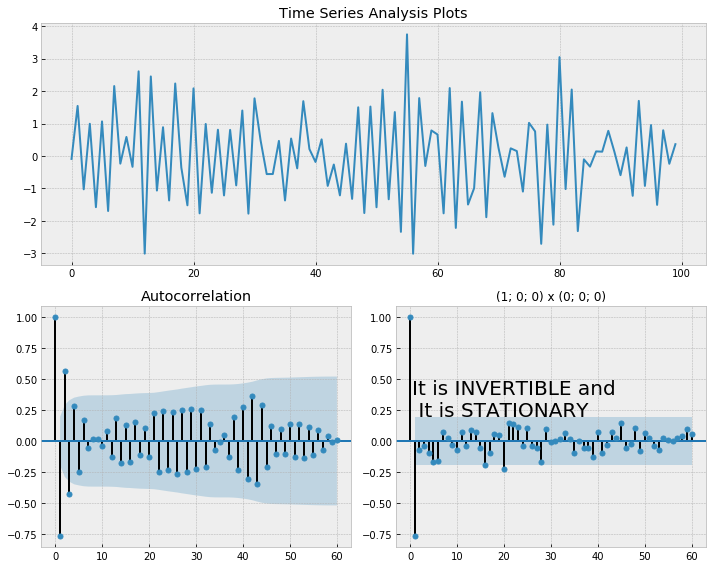

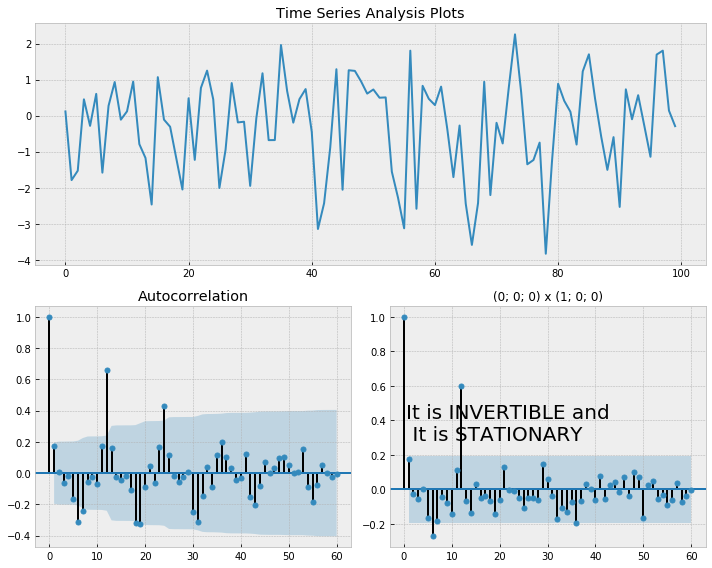

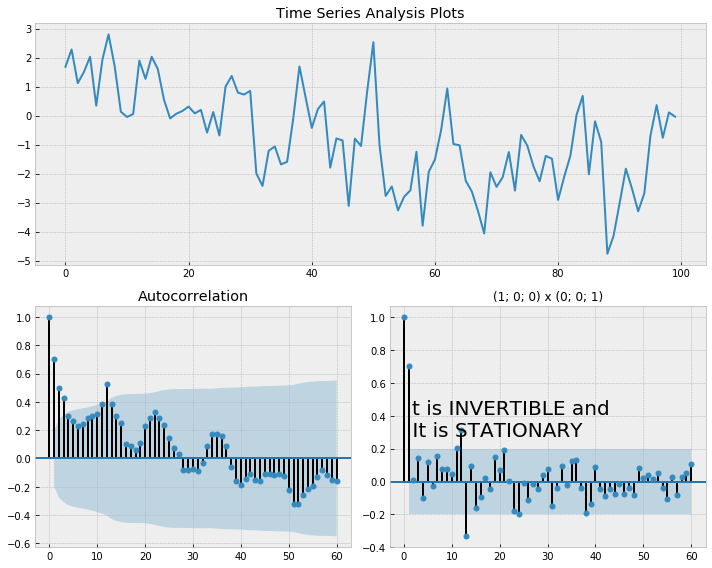

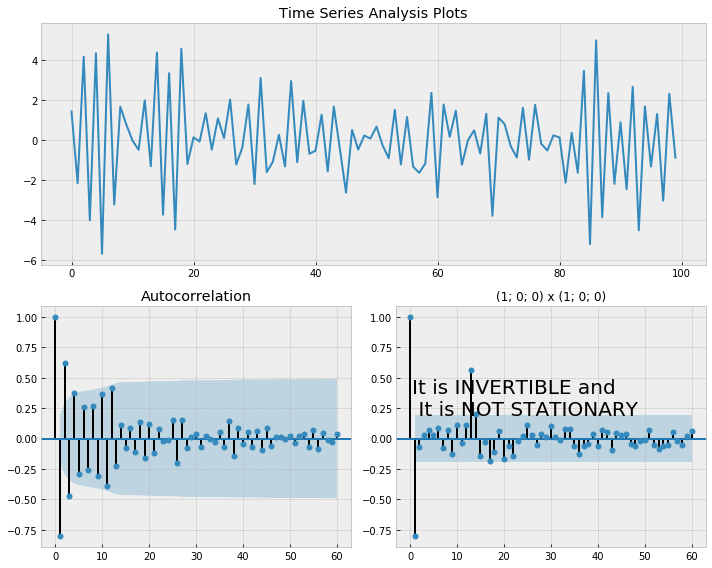

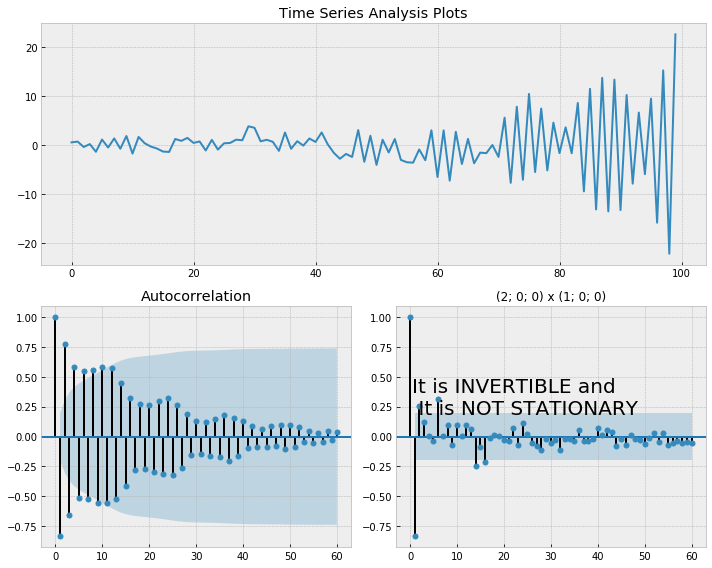

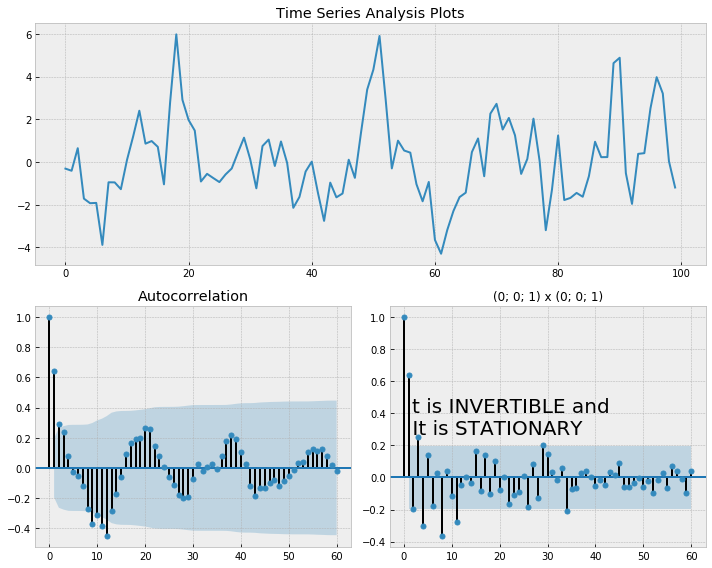

In [91]:
nSample = 100
dParam = 0          

for ar, ma, title, i in zip(ar_list, ma_list, models_text, range(len(models_text))):
    sim1 = simArima(ar = ar, d = dParam, ma = ma, n = nSample)
    tsplot(sim1,lags=60);
    plt.title(title)
    text = isInvertible(ma) + ' and \n ' + isStationary(ar)
    plt.text(0.5, 0.5,text,
     horizontalalignment='left',
     verticalalignment='top',
            fontsize=20)
    plt.savefig('report/'+ str(i+1) + title + '.png')
    plt.show()

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 12)   Log Likelihood                -148.726
Date:                            Tue, 02 Apr 2019   AIC                            303.452
Time:                                    15:07:54   BIC                            311.268
Sample:                                         0   HQIC                           306.615
                                            - 100                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6007      0.100      6.011      0.000       0.405       0.797
ar.S.L12       0.8909      0.048   

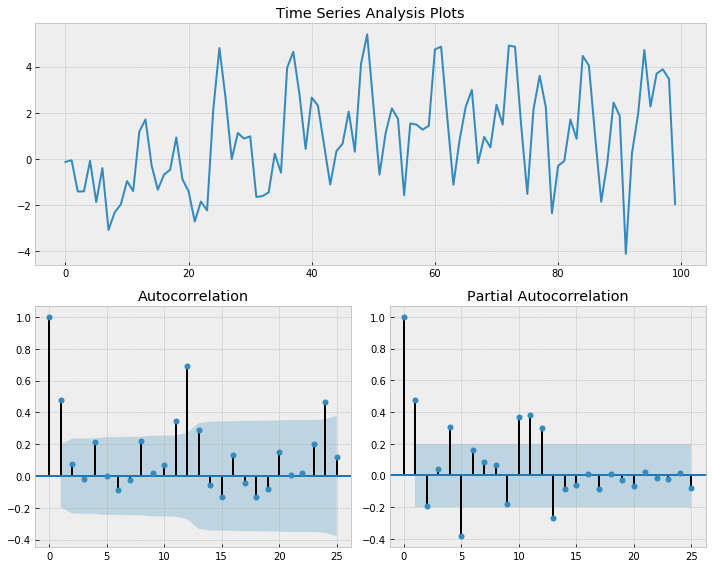

In [68]:
nSample = 100

dParam = 0          # Integrated parameter
sim1 = simArima(ar = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9]), d = dParam, 
                ma = np.array([ 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), n = nSample)
tsplot(sim1,lags=25)



In [70]:
import statsmodels.api as sm  
mod = sm.tsa.statespace.SARIMAX(sim1, trend='n', order=(0,0,1), seasonal_order=(1,0,0,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 12)   Log Likelihood                -148.726
Date:                            Tue, 02 Apr 2019   AIC                            303.452
Time:                                    15:09:46   BIC                            311.268
Sample:                                         0   HQIC                           306.615
                                            - 100                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6007      0.100      6.011      0.000       0.405       0.797
ar.S.L12       0.8909      0.048   